# Analyse stochastic simulations of linear feedback control

Author: Juvid Aryaman

In [5]:
!pwd

/mnt/c/Users/jarya/Dropbox/Work/Mit_and_Metabolism/Networks_mtDNA_dynamics/MitoNetworksGenetics/Linear_Feedback_Control/Stochastic_analysis/Fast_turnover/Analysis


In [6]:
import mitonetworks.det as mtd
import mitonetworks.stoch as mts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import warnings
warnings.simplefilter('ignore',UserWarning)

In [8]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [9]:
mts.reset_plots()

In [10]:
analysis = mts.AnalyseDataFeedbackControl(dir_df_params = './param_sweep_vals.csv',
dir_data = '../Data', ctrl_name = 'lfc', plotextensions=['png','svg'])

In [17]:
import mystyle.sty as sty
sty.update_functions_on_fly()

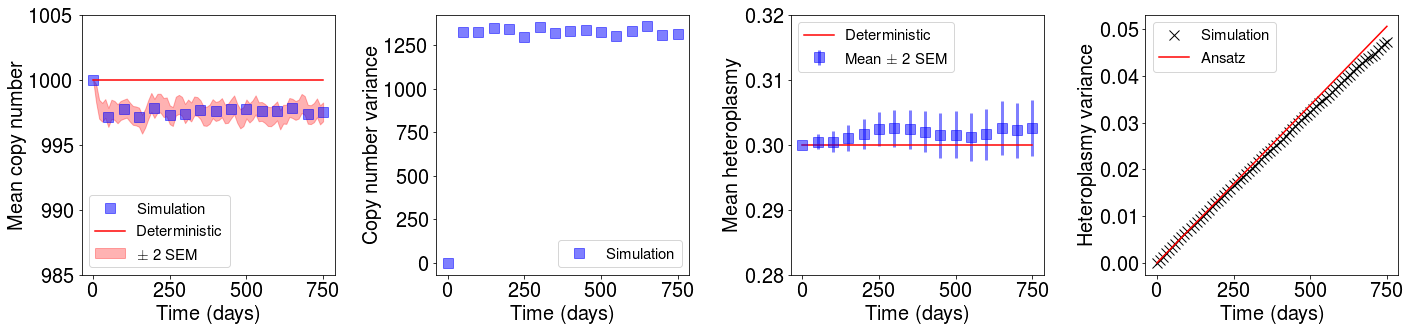

In [18]:
mp = 0.300
d = 2e-2
analysis.plot_h_n_t(0, figname='traj',ylim_mn=[985,1005], ylim_mh = [mp-d,mp+d],mh_errorbars=True);

In [13]:
data = pd.read_csv("../Data/online_stats_0.csv")
data.head()

,t,counts,nextinct,delta_n,mean_n,delta2_n,M2_n,var_n,delta_h,mean_h,...,cdf_fs_0_2,cdf_fs_0_3,cdf_fs_0_4,cdf_fs_0_5,cdf_fs_0_6,cdf_fs_0_7,cdf_fs_0_8,cdf_fs_0_9,p_fs_fix_0,p_fs_fix_1
0,0.0,10000.0,0.0,0.000000,1000.0000,0.0000,0.000000e+00,0.000000,0.000000,0.300000,...,0.0,0.0,0.0,10000.0,10000.0,10000.0,10000.0,10000.0,0.0,0.0
1,10.0,10000.0,0.0,32.040204,998.9630,32.0370,1.208820e+07,1208.940525,0.010325,0.300054,...,0.0,0.0,1.0,9681.0,10000.0,10000.0,10000.0,10000.0,0.0,0.0
2,20.0,10000.0,0.0,24.282028,997.7204,24.2796,1.310928e+07,1311.059330,0.021889,0.300031,...,0.0,0.0,4.0,9647.0,10000.0,10000.0,10000.0,10000.0,0.0,0.0
3,30.0,10000.0,0.0,33.517352,997.4860,33.5140,1.297093e+07,1297.222926,0.011998,0.300321,...,0.0,0.0,4.0,9630.0,10000.0,10000.0,10000.0,10000.0,0.0,0.0
4,40.0,10000.0,0.0,9.223322,997.7776,9.2224,1.298694e+07,1298.823621,0.025147,0.300576,...,0.0,0.0,4.0,9673.0,10000.0,10000.0,10000.0,10000.0,0.0,0.0


In [14]:
data.columns

Index(['t', 'counts', 'nextinct', 'delta_n', 'mean_n', 'delta2_n', 'M2_n',
       'var_n', 'delta_h', 'mean_h', 'delta2_h', 'M2_h', 'var_h', 'delta_w',
       'mean_w', 'delta2_w', 'M2_w', 'var_w', 'delta_m', 'mean_m', 'delta2_m',
       'M2_m', 'var_m', 'delta_ns', 'mean_ns', 'delta2_ns', 'M2_ns', 'var_ns',
       'delta_nf', 'mean_nf', 'delta2_nf', 'M2_nf', 'var_nf', 'delta_fs',
       'mean_fs', 'delta2_fs', 'M2_fs', 'var_fs', 'cdf_h_0_1', 'cdf_h_0_2',
       'cdf_h_0_3', 'cdf_h_0_4', 'cdf_h_0_5', 'cdf_h_0_6', 'cdf_h_0_7',
       'cdf_h_0_8', 'cdf_h_0_9', 'p_h_fix_0', 'p_h_fix_1', 'cdf_fs_0_1',
       'cdf_fs_0_2', 'cdf_fs_0_3', 'cdf_fs_0_4', 'cdf_fs_0_5', 'cdf_fs_0_6',
       'cdf_fs_0_7', 'cdf_fs_0_8', 'cdf_fs_0_9', 'p_fs_fix_0', 'p_fs_fix_1'],
      dtype='object')

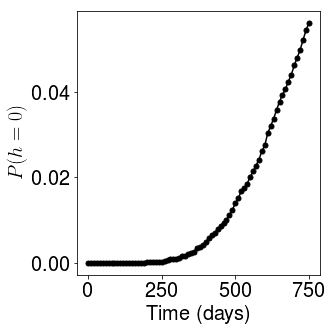

In [29]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.plot(data['t'], data['p_h_fix_0']/data['counts'], '.-k')
ax.set_xlabel('Time (days)')
ax.set_ylabel('$P(h=0)$')
sty.remove_tex_axis(ax, ytick_fmt="%.2f")
plt.tight_layout()
plt.savefig('fixation_prob.svg')